Loading Data from Kaggle

---



In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [3]:
# Unzipping files
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array,array_to_img,image_dataset_from_directory
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt


In [5]:
train_cats_dir='/content/train/cats'
train_dogs_dir='/content/train/dogs'
test_cats_dir='/content/test/cats'
test_dogs_dir='/content/test/dogs'
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(test_cats_dir)))
print('total validation dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 10000
total training dog images: 10000
total validation cat images: 2500
total validation dog images: 2500


In [6]:
base_model=VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
model=Sequential()
model.add(base_model)

In [8]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
base_model.trainable=False

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,
                                 vertical_flip=True,rotation_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,zoom_range=0.2)

test_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,
                                vertical_flip=True,rotation_range=0.2,
                                width_shift_range=0.2,
                                 height_shift_range=0.2,zoom_range=0.2)

train_ds=train_datagen.flow_from_directory('/content/train',batch_size=64,
                                           target_size=(150,150),
                                           class_mode='binary')

test_ds=test_datagen.flow_from_directory('/content/test',batch_size=64,
                                         target_size=(150,150),
                                         class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [18]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=3,verbose=1)

In [19]:
history=model.fit(train_ds,validation_data=test_ds,epochs=10,callbacks=callback)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 208s 663ms/step - accuracy: 0.8459 - loss: 0.3358 - val_accuracy: 0.8434 - val_loss: 0.3369
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 652ms/step - accuracy: 0.8523 - loss: 0.3277 - val_accuracy: 0.8524 - val_loss: 0.3280
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 651ms/step - accuracy: 0.8558 - loss: 0.3262 - val_accuracy: 0.8618 - val_loss: 0.3120
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 208s 665ms/step - accuracy: 0.8614 - loss: 0.3193 - val_accuracy: 0.8584 - val_loss: 0.3195
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 651ms/step - accuracy: 0.8661 - loss: 0.3099 - val_accuracy: 0.8612 - val_loss: 0.3177
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 652ms/step - accuracy: 0.8639 - loss: 0.3056 - val_accuracy: 0.8656 - val_loss: 0.3070
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 206s 659ms/step - accuracy: 0.8618 - loss: 0.3098 - val_accuracy: 0.8592 - val_loss: 0.3160
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 207s 661ms/step - accuracy: 0.8657 -

In [20]:
# plotting graph
def plot_loss_accuracy(history):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  epochs=range(len(acc))
  plt.plot(epochs,acc,'bo--',label='Training Accuracy')
  plt.plot(epochs,val_acc,'g',label='Test Accuracy')
  plt.title('Train and Test accuracy')
  plt.legend(loc='lower right')
  plt.figure(0)

  plt.plot(epochs,loss,'bo--',label='Training Loss')
  plt.plot(epochs,val_loss,'g',label='Test Loss')
  plt.title('Train and Test loss')
  plt.legend()

  plt.show()

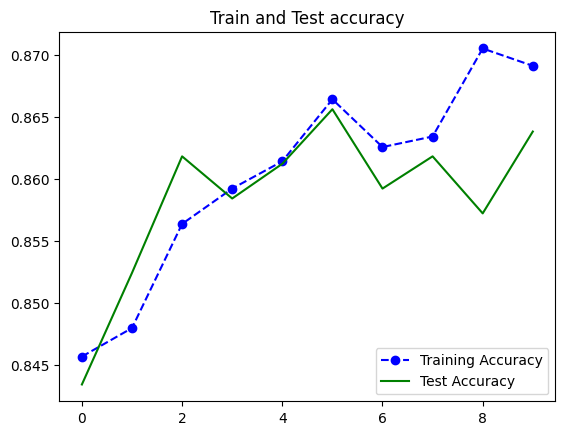

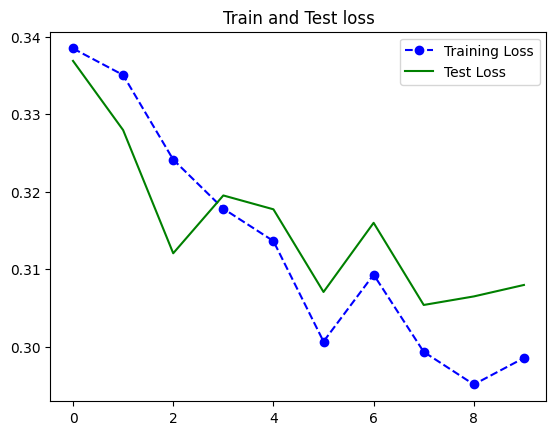

In [21]:
plot_loss_accuracy(history)